# Relaciones de Kramer-Kronig

### Juan Esteban Ospina
### Alejandra Echeverri
### Santiago Moreno
En este notebook se incluye un codigo basado en el metodo de McLaurin para calcular las relaciones de Kramers-Kronig

In [2]:
#Cargamos las librerias necesarias
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib
from scipy.signal import medfilt

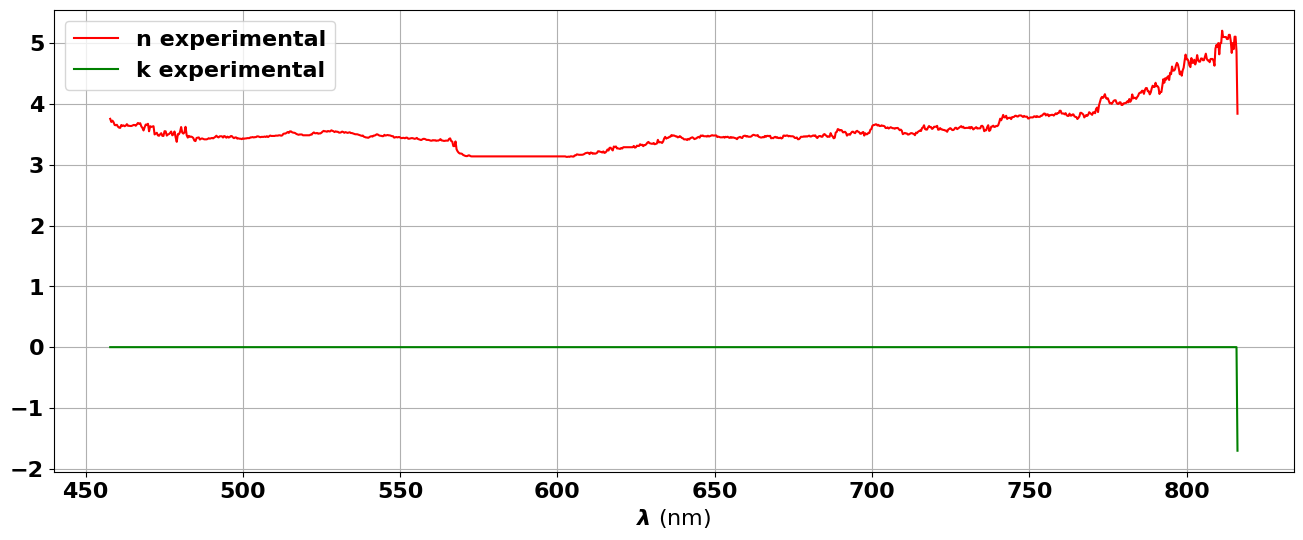

True

In [20]:
def plot(dark,reference,sample,material):    
    lim=300
    lim2=200
    #Window size determina un tamaño de filtro para suavizar el espectro. Debe ser un valor par.
    Window_size=201
    #Se carga la señal oscura de la referencia
    f = pd.read_csv (dark, sep='\t',skiprows=14, skipfooter=1)
    Ir = np.array(f)[lim:-lim2,1]
    wld = np.array(f)[lim:-lim2,0]
    #Se carga la señal de la referencia
    f = pd.read_csv (reference, sep='\t',skiprows=14, skipfooter=1)
    Is = np.array(f)[lim:-lim2,1]
    #Se carga la señal oscura de la muestra
    f = pd.read_csv (dark, sep='\t',skiprows=14, skipfooter=1)
    Ir1 = np.array(f)[lim:-lim2,1]
    #Se carga la señal de la muestra
    f = pd.read_csv (sample, sep='\t',skiprows=14, skipfooter=1)
    Is1 = np.array(f)[lim:-lim2,1]
    Is1=Is1
    Is=Is
    #Aqui se filtra el espectro y la referencia
    Is1=medfilt(medfilt(Is1,kernel_size=Window_size))
    Is=medfilt(medfilt(Is,kernel_size=Window_size))
    #Se calcula la reflectancia y grafica
    R1=Is1/Is


    #Finalmente, calculamos la fase del coeficiente de reflexion a partir de la reflectancia
    wn2d = 1/wld[::-1]
    R2=R1   
    lnr=np.log(R2)/2
    # método Mc Claurin
    dn = np.zeros(len(wn2d))
    h = wn2d[1]-wn2d[0]
    for ii in range(len(wn2d)):
        if(ii % 2 == 0 ):
            f = 0 
            for jj in range(1,len(wn2d),2):
                f = f + wn2d[ii]*lnr[jj]/(wn2d[jj]**2 - wn2d[ii]**2)
        else:
            f = 0
            for jj in range(0,len(wn2d),2):
                f = f + wn2d[ii]*lnr[jj]/(wn2d[jj]**2 - wn2d[ii]**2)
        dn[ii] = 2*2*h/np.pi*f
        phaser = -dn
    
    nn=(1-R2**2)/(1+R2**2-2*R2*np.cos(phaser))
    kk=2*R2*np.sin(phaser)/(1+R2**2-2*R2*np.cos(phaser))

    plt.figure(figsize=(16,6))
    plt.plot(wld,nn,'r-',label='n experimental')
    plt.plot(wld,kk,'g-',label='k experimental')
    plt.title(material)
    plt.xlabel(r'$\lambda$ (nm)')
    plt.legend()
    plt.grid()
    plt.show()
    return True

plots('clean_data/Si.Master.dark.csv','clean_data/Si.Master.reference.csv','clean_data/Si.Master.sample.csv','Si')

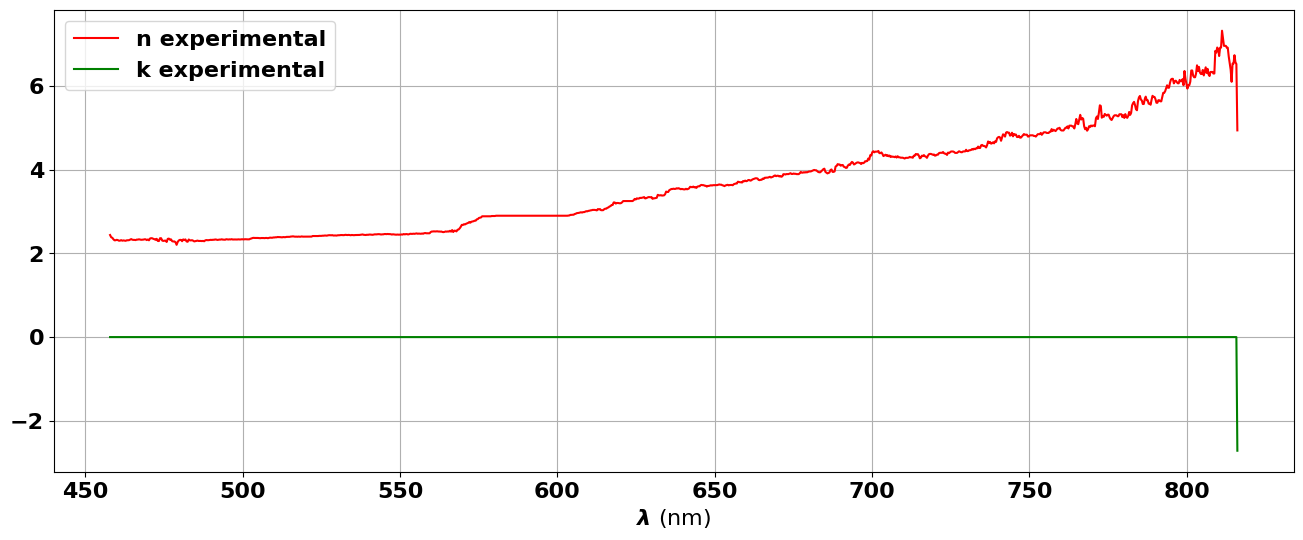

True

In [21]:
dark = 'clean_data/Cu.Master.dark.csv'
reference = 'clean_data/Cu.Master.reference.csv'
sample = 'clean_data/Cu.Master.sample.csv'
plots(dark,reference,sample,'Cu')

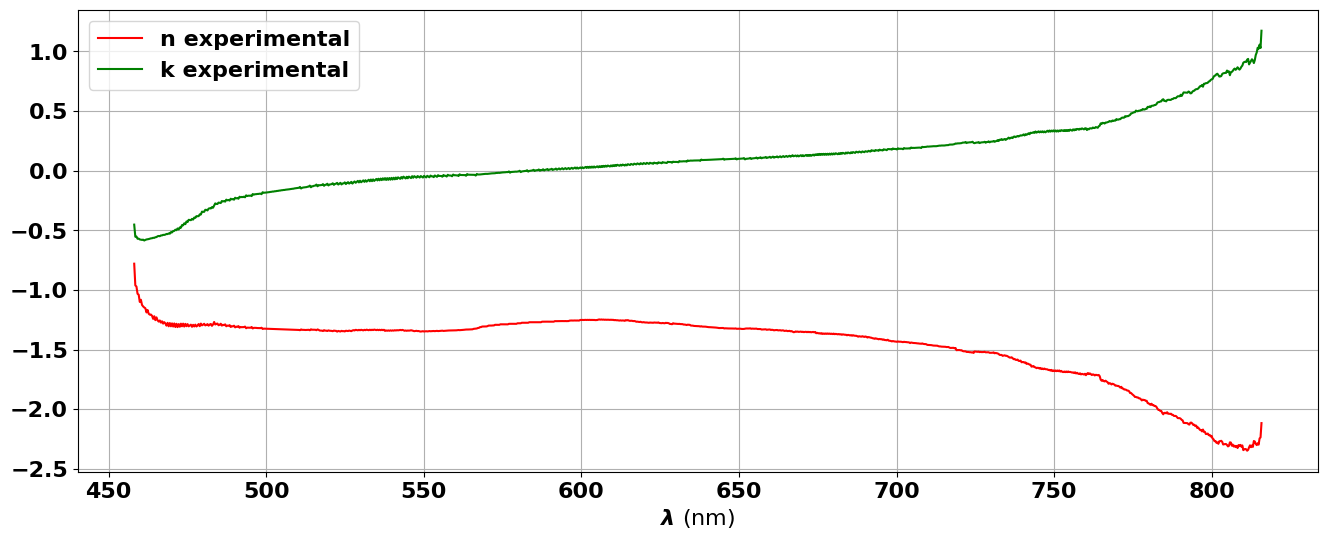

In [22]:
#Finalmente, calculamos la fase del coeficiente de reflexion a partir de la reflectancia
wn2d = 1/wld[::-1]
R2=R1   
lnr=np.log(R2)/2
# método Mc Claurin
dn = np.zeros(len(wn2d))
h = wn2d[1]-wn2d[0]
for ii in range(len(wn2d)):
  if(ii % 2 == 0 ):
    f = 0 
    for jj in range(1,len(wn2d),2):
      f = f + wn2d[ii]*lnr[jj]/(wn2d[jj]**2 - wn2d[ii]**2)
  else:
    f = 0
    for jj in range(0,len(wn2d),2):
      f = f + wn2d[ii]*lnr[jj]/(wn2d[jj]**2 - wn2d[ii]**2)
      
  dn[ii] = 2*2*h/np.pi*f
  phaser = -dn
  
nn=(1-R2**2)/(1+R2**2-2*R2*np.cos(phaser))
kk=2*R2*np.sin(phaser)/(1+R2**2-2*R2*np.cos(phaser))

plt.figure(figsize=(16,6))
plt.plot(wld,nn,'r-',label='n experimental')
plt.plot(wld,kk,'g-',label='k experimental')
plt.xlabel(r'$\lambda$ (nm)')
plt.legend()
plt.grid()
plt.show()


# Calibración del espectrometro

Partimos de la calibración del espectrometro, para ello se toman los datos de la calibración del espectrometro y se ajusta una función de la forma:

$$  \lambda = a + b \cdot x + c \cdot x^2 + d \cdot x^3 $$

Donde $x$ es el numero de pixel y $\lambda$ es la longitud de onda en nm.


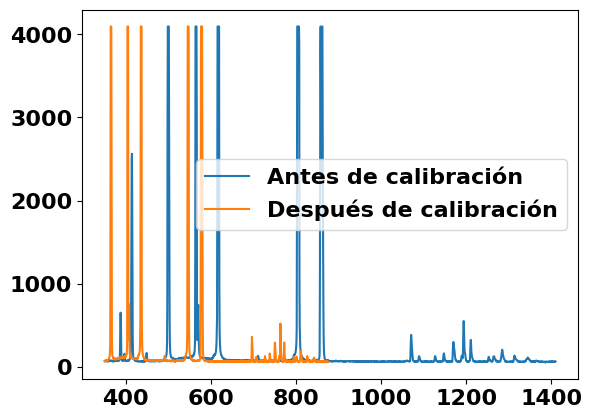

In [5]:
df_Antes_Calibracion = pd.read_csv('clean_data/AntesCalibracion.Master.sample.csv' )
df_Después_Calibracion = pd.read_csv('clean_data/DespuesCalibracion.Master.sample.csv' )
plt.plot(df_Antes_Calibracion['Wavelength'],df_Antes_Calibracion['Intensity'], label = 'Antes de calibración')
plt.plot(df_Después_Calibracion['Wavelength'],df_Después_Calibracion['Intensity'], label = 'Después de calibración')
plt.legend()

# Reflectancia Al

Se toman los datos de reflectancia del aluminio y se ajusta una función de la forma:

$$ R_{\lambda} = \frac{S_{\lambda}- D_{\lambda}}{R_{\lambda}- D_{\lambda}} $$

Donde $R$ es la reflectancia y $\lambda$ es la longitud de onda en nm.

(0.0, 100.0)

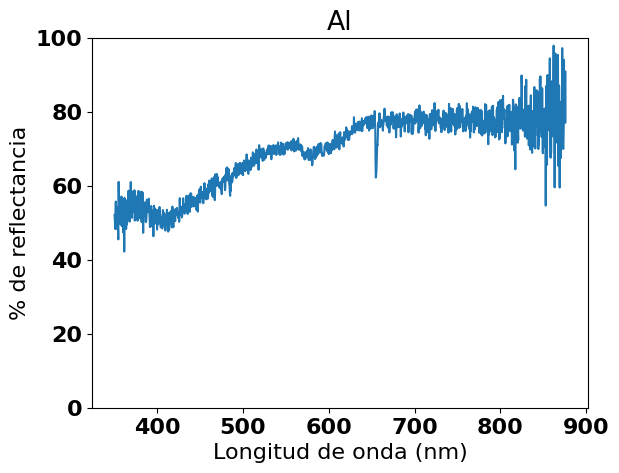

In [6]:
df_AlD = pd.read_csv('clean_data/AL.Master.dark.csv')
df_AlR = pd.read_csv('clean_data/AL.Master.reference.csv')
df_AlS = pd.read_csv('clean_data/AL.Master.sample.csv')

dfnum = (df_AlS['Intensity'] - df_AlD['Intensity'])*100/(df_AlR['Intensity'] - df_AlD['Intensity'])
plt.title('Al')
plt.plot(df_AlS['Wavelength'],dfnum, label = 'Al')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('% de reflectancia')
plt.ylim(0,100)


# Reflectancia del cobre

Se toman los datos de reflectancia del cobre y se ajusta una función de la forma:

$$ R_{\lambda} = \frac{S_{\lambda}- D_{\lambda}}{R_{\lambda}- D_{\lambda}} $$

Donde $R$ es la reflectancia y $\lambda$ es la longitud de onda en nm.

(0.0, 100.0)

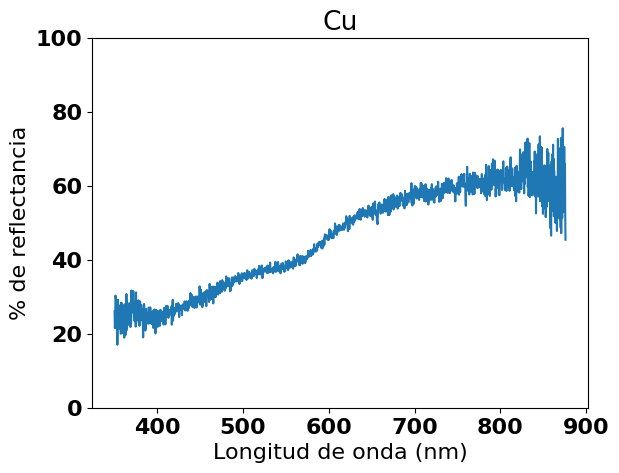

In [7]:
df_CuD = pd.read_csv('clean_data/Cu.Master.dark.csv')
df_CuR = pd.read_csv('clean_data/Cu.Master.reference.csv')
df_CuS = pd.read_csv('clean_data/Cu.Master.sample.csv')

dfnum = (df_CuS['Intensity'] - df_CuD['Intensity'])*100/(df_CuR['Intensity'] - df_CuD['Intensity'])
plt.title('Cu')
plt.plot(df_CuS['Wavelength'],dfnum, label = 'Al')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('% de reflectancia')
plt.ylim(0,100)

# Reflectancia del silicio

Se toman los datos de reflectancia del silicio y se ajusta una función de la forma:

$$ R_{\lambda} = \frac{S_{\lambda}- D_{\lambda}}{R_{\lambda}- D_{\lambda}} $$

Donde $R$ es la reflectancia y $\lambda$ es la longitud de onda en nm.

(0.0, 100.0)

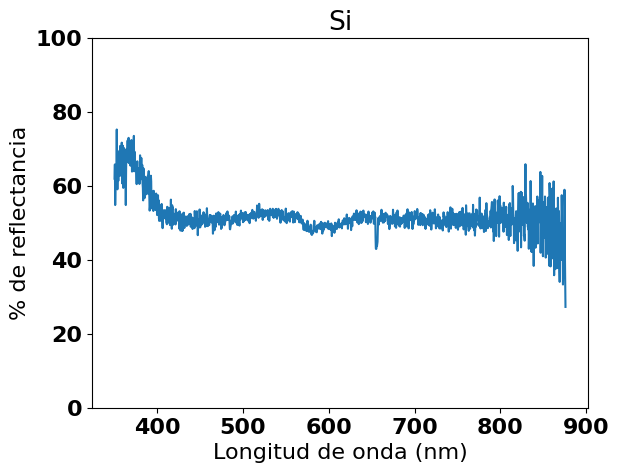

In [8]:
df_SiD = pd.read_csv('clean_data/Si.Master.dark.csv')
df_SiR = pd.read_csv('clean_data/Si.Master.reference.csv')
df_SiS = pd.read_csv('clean_data/Si.Master.sample.csv')

dfnum = (df_SiS['Intensity'] - df_SiD['Intensity'])*100/(df_SiR['Intensity'] - df_SiD['Intensity'])
plt.title('Si')
plt.plot(df_SiS['Wavelength'],dfnum, label = 'Al')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('% de reflectancia')
plt.ylim(0,100)
